In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import folium
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
path = '../../input/train/'

In [3]:
# 雨量のデータの読み込み
rain_data = pd.read_csv(path + 'rainfall/data.csv')
rain_stations = pd.read_csv(path + 'rainfall/stations.csv')

print('雨量観測データ：', rain_data.shape)
display(rain_data.head(3))
print('*'*80)
print('*'*80)

print('雨量観測データ所', rain_stations.shape)
display(rain_stations.head(3))
print('*'*80)
print('*'*80)

# 潮位のデータの読み込み
tide_data = pd.read_csv(path + 'tidelevel/data.csv')
tide_stations = pd.read_csv(path + 'tidelevel/stations.csv')
print('潮位観測データ', tide_data.shape)
display(tide_data.head(3))
print('*'*80)
print('*'*80)

print('潮位観測データ所', tide_stations.shape)
display(tide_stations.head(3))
print('*'*80)
print('*'*80)

# 水位のデータの読み込み
water_data = pd.read_csv(path + 'waterlevel/data.csv')
water_stations = pd.read_csv(path + 'waterlevel/stations.csv')
print('水位観測データ：', water_data.shape)
display(water_data.head(3))
print('*'*80)
print('*'*80)

print('水位観測データ所', water_stations.shape)
display(water_stations.head(3))
print('*'*80)
print('*'*80)

# damデータの読み込み
dam = pd.read_csv(path + 'dam.csv')
print('damデータ：', dam.shape)
display(dam.head(3))
print('*'*80)
print('*'*80)


雨量観測データ： (896003, 27)


,date,station,city,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,0,栗谷,大竹市,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,大竹市,大竹市,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,弥栄ダム(国),大竹市,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


********************************************************************************
********************************************************************************
雨量観測データ所 (313, 11)


,観測所名称,フリガナ,市町,水系名,河川名,データ所管,住所,緯度,経度,事務所,入力時使用
0,西部建設,セイブケンセツ,広島市南区,太田川,京橋川,河川課,広島市南区比治山本町１６－１２ 西部建設事務所内,34.381667,132.466667,NaN,1
1,上瀬野,カミセノ,広島市安芸区,瀬野川,瀬野川,河川課,広島市安芸区上瀬野瀬野川公園内,34.428333,132.618056,NaN,1
2,熊野町,クマノチョウ,熊野町,二河川,二河川,河川課,安芸郡熊野町３８１５－１ 熊野町役場内,34.338889,132.568056,NaN,1


********************************************************************************
********************************************************************************
潮位観測データ (28483, 27)


,date,station,city,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,0,広島港,広島市南区,1.51,0.86,0.28,0.0,0.26,0.95,1.7,2.38,3.08,3.6,3.68,3.33,2.74,2.05,1.55,1.11,0.96,1.33,1.95,2.52,2.94,3.26,3.22,2.64
1,0,呉阿賀港,呉市,1.66,0.96,0.41,0.2,0.45,1.01,1.68,2.53,3.22,3.63,3.72,3.42,2.88,2.31,1.68,1.24,1.16,1.45,1.96,2.5,3.03,3.33,3.22,2.71
2,0,竹原港,竹原市,1.92,1.13,0.46,0.07,0.12,0.58,1.12,2.01,2.85,3.39,3.64,3.52,3.09,2.53,1.85,1.24,0.96,1.14,1.55,2.07,2.71,3.19,3.27,2.91


********************************************************************************
********************************************************************************
潮位観測データ所 (13, 10)


,観測所名,ふりがな,水系名,河川名,事務所,所管,住所,経度,緯度,入力時使用
0,大竹港,おおたけこう,中国その他,沿岸部,廿日市支所,港湾漁港整備課,大竹市晴海,132.223816,34.239601,1
1,広島港,ひろしまこう,中国その他,沿岸部,広島港湾振興,海上保安庁・港湾漁港整備課,広島市南区宇品海岸地先,132.456146,34.353161,1
2,柿浦港,かきうらこう,中国その他,沿岸部,広島港湾振興,港湾漁港整備課,江田島市大柿町柿浦,132.467941,34.184589,1


********************************************************************************
********************************************************************************
水位観測データ： (392066, 27)


,date,station,river,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,0,釜ヶ原,小瀬川,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76
1,0,下ヶ原(国),小瀬川,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71
2,0,防鹿(国),小瀬川,4.71,4.71,4.7,4.7,4.71,4.71,4.71,4.7,4.7,4.7,4.7,4.7,4.7,4.71,4.7,4.7,4.71,4.7,4.7,4.7,4.71,4.7,4.7,4.7


********************************************************************************
********************************************************************************
水位観測データ所 (180, 12)


,観測所名称,フリガナ,水系名,河川名,事務所,市町,データ所管,住所,緯度,経度,入力時使用,評価対象
0,多治比,タジヒ,江の川,多治比川,西部建設事務所,安芸高田市,河川課,安芸高田市吉田町多冶比,34.681944,132.667222,1,1
1,南原,ナバラ,太田川,南原川,西部建設事務所,広島市安佐北区,河川課,広島市安佐北区可部町上町屋字下小野1452番2,34.540556,132.501389,1,1
2,向原,ムカイハラ,太田川,三篠川,西部建設事務所,安芸高田市,河川課,安芸高田市向原町長田字田屋３４６２－２地先,34.607306,132.703333,1,1


********************************************************************************
********************************************************************************
damデータ： (12, 21)


,ダムｺｰﾄﾞ,建設(支)局ｺｰﾄﾞ,分類,水系名,河川名,施設区分,ダム名,管理者,都道府県,位置,緯度,経度,完成年月,集水面積_km2,堤体積_千m3,総貯水容量_千m3,有効貯水容量_千m3,型式,堤高_m,堤頂長_m,診断結果
0,1,1,河川,小瀬川,小瀬川,ダム,小瀬川ダム,広島県,広島県,廿日市市浅原,34.308043,132.123513,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C
1,2,40,河川,沼田川,椋梨川,ダム,椋梨ダム,広島県,広島県,東広島市河内町,34.501654,132.892374,S44.3,160.0,69300,7540,6270,重力式コンクリート,39.5,213.4,C
2,3,20,河川,野呂川,野呂川,ダム,野呂川ダム,広島県,広島県,呉市安浦町,34.288278,132.709726,S51.3,13.0,96300,1700,1200,重力式コンクリート,44.8,170.0,B2


********************************************************************************
********************************************************************************


In [4]:
map = folium.Map(
    location = ['34.5447', '132.8134'],
    zoom_start = 10,
    tiles = 'OpenStreetMap'
)
water_station = water_stations.dropna(subset = ['緯度', '経度'])
for i in range(len(water_station)):
    folium.Circle(radius=150, location=[water_station.iloc[i]['緯度'], water_station.iloc[i]['経度']],
                  tooltip=str(water_station.iloc[i]['観測所名称'] + ' (' + water_station.iloc[i]['フリガナ'] + ')'),
                  color='red', fill=False).add_to(map)

rain_station = rain_stations.dropna(subset=['緯度', '経度'])
for i in range(len(rain_station)):
    folium.Circle(radius=150, location=[rain_station.iloc[i]['緯度'], rain_station.iloc[i]['経度']],
                  tooltip=str(rain_station.iloc[i]['観測所名称'] + ' (' + rain_station.iloc[i]['フリガナ'] + ')'),
                  color='blue', fill=False).add_to(map)
    
tide_station = tide_stations.dropna(subset=['緯度', '経度'])
for i in range(len(tide_station)):
    folium.Circle(radius=150, location=[tide_station.iloc[i]['緯度'], tide_station.iloc[i]['経度']],
                  tooltip=str(tide_station.iloc[i]['観測所名'] + ' (' + tide_station.iloc[i]['ふりがな'] + ')'),
                  color='green', fill=False).add_to(map)
print('赤：水位観測データ所')
print('青：雨量観測データ所')
print('緑：潮位観測データ所')
    
map

赤：水位観測データ所
青：雨量観測データ所
緑：潮位観測データ所


In [5]:
hour_list = [
    '00:00:00', 
    '01:00:00', 
    '02:00:00',
    '03:00:00', 
    '04:00:00', 
    '05:00:00', 
    '06:00:00', 
    '07:00:00', 
    '08:00:00',
    '09:00:00', 
    '10:00:00', 
    '11:00:00', 
    '12:00:00', 
    '13:00:00', 
    '14:00:00',
    '15:00:00', 
    '16:00:00', 
    '17:00:00', 
    '18:00:00', 
    '19:00:00', 
    '20:00:00',
    '21:00:00', 
    '22:00:00', 
    '23:00:00'
]

date_list = water_data['date'].unique()
station_river_list = (water_data['station'].astype(str) + '_' + water_data['river'].astype(str)).unique()

# station_list = water_data['station'].unique()
# river_list = water_data['river'].unique()

In [6]:
eda_water_data = water_data.copy()
eda_water_data['water_sum'] = 0

for hour in hour_list:
    eda_water_data[hour] = eda_water_data[hour].replace({'M':0.00, '*':0.00, '-':0.00, '--':0.00, '**':0.00})
    eda_water_data[hour] = eda_water_data[hour].astype(float)
    eda_water_data['water_sum'] = eda_water_data['water_sum'] + eda_water_data[hour]

# EDA

In [7]:
import seaborn as sns

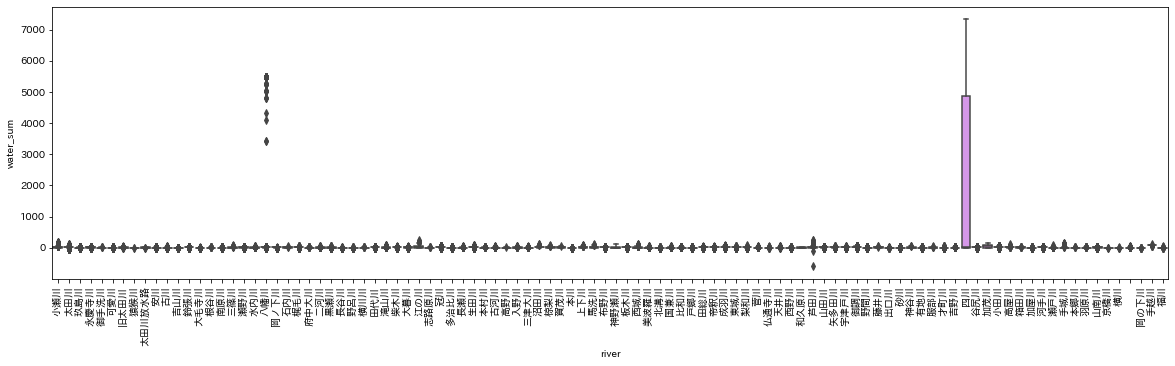

In [8]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = eda_water_data, x = 'river', y = 'water_sum')
plt.xticks(rotation = 90)
plt.show()

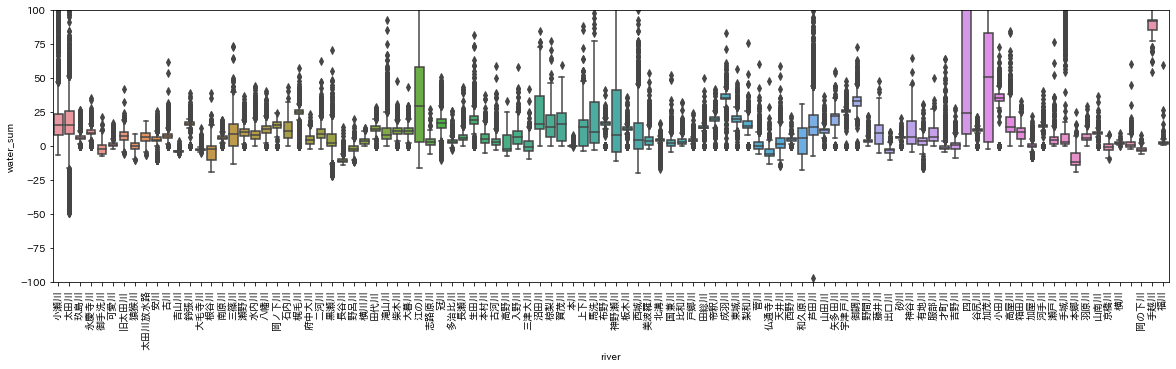

In [9]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = eda_water_data, x = 'river', y = 'water_sum')
plt.xticks(rotation = 90)
plt.ylim(-100, 100)
plt.show()

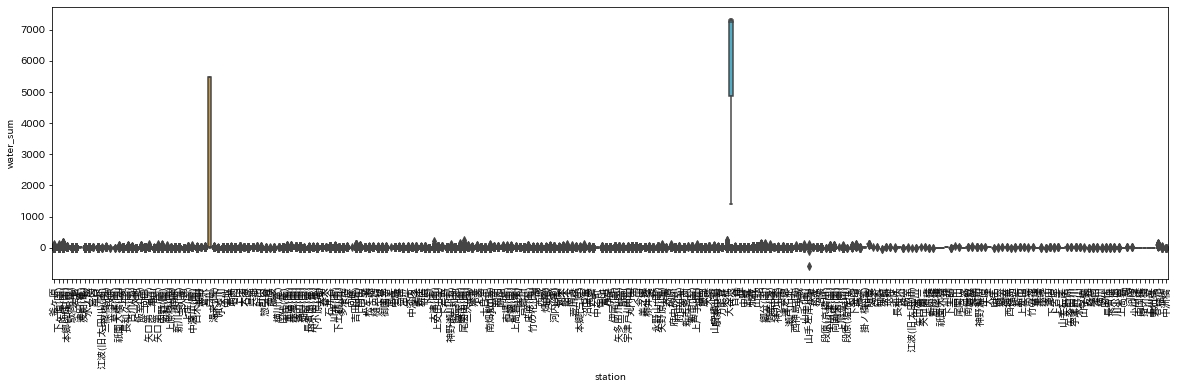

In [10]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = eda_water_data, x = 'station', y = 'water_sum')
plt.xticks(rotation = 90)
plt.show()

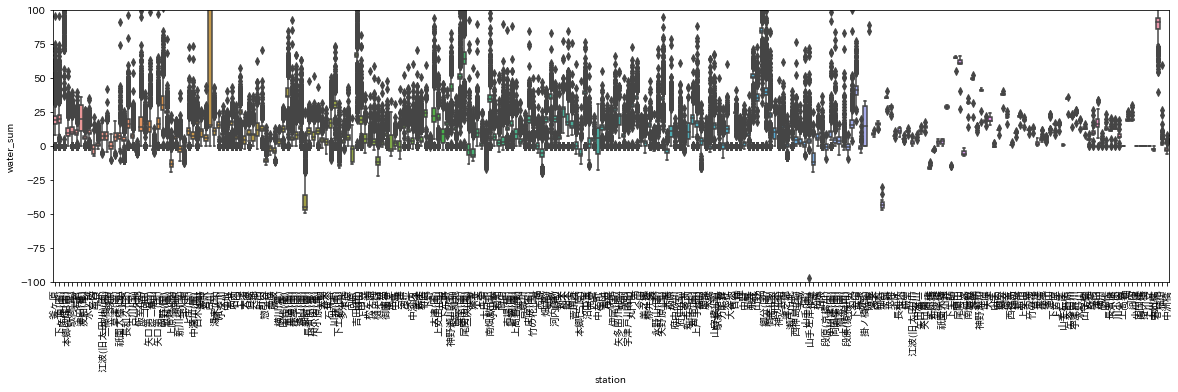

In [11]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = eda_water_data, x = 'station', y = 'water_sum')
plt.xticks(rotation = 90)
plt.ylim(-100, 100)
plt.show()

In [12]:
eda_water_data.describe()

,date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,water_sum
count,392066.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392063.000000
mean,1094.817862,2.306785,2.299366,2.275066,2.281411,2.286186,2.283432,2.285574,2.287497,2.295082,2.295695,2.282664,2.285486,2.286224,2.282254,2.271217,2.275475,2.265597,2.278693,2.276737,2.281540,2.290334,2.309045,2.309504,2.305649,54.896705
std,632.508733,21.886215,21.870401,21.791243,21.863007,21.910302,21.895941,21.893927,21.869310,21.875315,21.873893,21.803760,21.836594,21.854108,21.866488,21.861474,21.911499,21.859137,21.907511,21.854689,21.827697,21.831656,21.891874,21.873305,21.847046,521.395317
min,0.000000,-99.990000,-2.040000,-2.050000,-2.060000,-2.130000,-2.150000,-2.040000,-2.040000,-2.050000,-2.050000,-2.050000,-2.090000,-2.060000,-2.060000,-2.070000,-2.080000,-2.080000,-2.060000,-99.990000,-99.990000,-99.980000,-99.980000,-99.980000,-99.980000,-598.750000
25%,547.000000,0.060000,0.060000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.040000,0.030000,0.030000,0.030000,0.020000,0.020000,0.020000,0.030000,0.040000,0.040000,0.050000,0.050000,0.060000,0.060000,0.060000,1.750000
50%,1095.000000,0.390000,0.390000,0.380000,0.370000,0.370000,0.370000,0.380000,0.380000,0.380000,0.380000,0.370000,0.370000,0.370000,0.360000,0.360000,0.360000,0.360000,0.370000,0.370000,0.380000,0.380000,0.390000,0.390000,0.390000,9.050000
75%,1643.000000,0.760000,0.750000,0.740000,0.730000,0.730000,0.730000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000,0.740000,0.730000,0.730000,0.720000,0.720000,0.730000,0.740000,0.740000,0.750000,0.760000,0.760000,0.760000,17.240000
max,2190.000000,305.470000,305.420000,305.370000,305.330000,305.310000,305.300000,305.330000,305.380000,305.390000,305.370000,305.340000,305.300000,305.280000,305.250000,305.240000,305.220000,305.210000,305.230000,305.270000,305.340000,305.390000,305.430000,305.510000,305.520000,7326.790000


In [13]:
eda_water_data[eda_water_data['00:00:00'] >= 100]

,date,station,river,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,water_sum
36,0,白川,八幡川,228.04,228.04,228.04,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,5472.75
157,0,大谷池,四川,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.15,305.16,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,7323.73
215,1,白川,八幡川,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,5472.72
336,1,大谷池,四川,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,7323.60
394,2,白川,八幡川,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,5472.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391204,2186,大谷池,四川,302.19,302.19,302.19,302.20,302.19,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,7252.76
391383,2187,大谷池,四川,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.21,7252.81
391562,2188,大谷池,四川,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,7253.04
391741,2189,大谷池,四川,302.21,302.21,302.21,302.21,302.21,302.22,302.22,302.22,302.22,302.22,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,7253.37


In [14]:
eda_water_data[eda_water_data['00:00:00'] <= -90]

,date,station,river,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,water_sum
16822,93,山手左岸(国),芦田川,-99.99,0.0,0.03,0.11,0.17,0.18,0.19,0.19,0.17,0.14,0.12,0.13,0.1,0.12,0.11,0.11,0.13,0.12,0.12,0.13,0.13,0.13,0.13,0.13,-97.1


In [15]:
eda_water_data[eda_water_data['23:00:00'] <= -90]

,date,station,river,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,water_sum
16643,92,山手左岸(国),芦田川,0.08,0.06,0.06,0.07,0.08,0.09,0.1,0.1,0.1,0.1,0.1,0.1,0.05,0.03,0.02,0.01,0.0,0.0,-99.99,-99.99,-99.98,-99.98,-99.98,-99.98,-598.75


In [16]:
exception_river_list = ['四川', '八幡川', '芦田川']

In [17]:
import itertools
import tqdm
import time

In [18]:
print(water_stations.shape)
stations_info_df = water_stations[water_stations['評価対象'] == 1][['観測所名称', '緯度', '経度']].drop_duplicates()
print(stations_info_df.shape)

(180, 12)
(166, 3)


In [19]:
def calc_rain_place(df):
    
    calc_df = rain_stations[rain_stations['入力時使用'] == 1].copy()
    calc_df['calc_緯度'] = df['緯度']
    calc_df['calc_経度'] = df['経度']
    
    calc_df['diff_place'] = np.sqrt((calc_df['緯度'] - calc_df['calc_緯度'])**2 + (calc_df['経度'] - calc_df['calc_経度'])**2) 
    
    nearest_place = calc_df['diff_place'].min()
    calc_df = calc_df[calc_df['diff_place'] == nearest_place].reset_index(drop = True)
 
    return calc_df.loc[0, '観測所名称']

In [20]:
def calc_tide_place(df):
    
    calc_df = tide_stations[tide_stations['入力時使用'] == 1].copy()
    calc_df['calc_緯度'] = df['緯度']
    calc_df['calc_経度'] = df['経度']
    
    calc_df['diff_place'] = np.sqrt((calc_df['緯度'] - calc_df['calc_緯度'])**2 + (calc_df['経度'] - calc_df['calc_経度'])**2) 
    
    nearest_place = calc_df['diff_place'].min()
    calc_df = calc_df[calc_df['diff_place'] == nearest_place].reset_index(drop = True)
 
    return calc_df.loc[0, '観測所名']

In [21]:
def calc_dam_place(df):
    
    calc_df = dam.copy()
    calc_df['calc_緯度'] = df['緯度']
    calc_df['calc_経度'] = df['経度']
    
    calc_df['diff_place'] = np.sqrt((calc_df['緯度'] - calc_df['calc_緯度'])**2 + (calc_df['経度'] - calc_df['calc_経度'])**2) 
    
    nearest_place = calc_df['diff_place'].min()
    calc_df = calc_df[calc_df['diff_place'] == nearest_place].reset_index(drop = True)
 
    return calc_df.loc[0, 'ダム名']

In [22]:
stations_info_df['rain_station'] = stations_info_df.apply(calc_rain_place, axis = 1)

In [23]:
stations_info_df['tide_station'] = stations_info_df.apply(calc_tide_place, axis = 1)

In [24]:
stations_info_df['dam_station'] = stations_info_df.apply(calc_dam_place, axis = 1)

In [25]:
stations_info_df.head()

,観測所名称,緯度,経度,rain_station,tide_station,dam_station
0,多治比,34.681944,132.667222,多治比,広島港,福富ダム
1,南原,34.540556,132.501389,南原(国),広島港,梶毛ダム
2,向原,34.607306,132.703333,向原坂,竹原港,福富ダム
3,上甲立,34.708333,132.739444,下甲立,竹原港,福富ダム
4,上安,34.469306,132.460000,高瀬(国),広島港,梶毛ダム


In [26]:
use_stations = stations_info_df['観測所名称'].unique()

In [27]:
model_data = water_data[water_data['station'].isin(use_stations)].copy()
model_data = model_data.rename(columns = {'station':'water_station'})
for hour in hour_list:
    model_data = model_data.rename(columns = {hour:'water_' + hour})

In [28]:
print(model_data.shape)

model_data = pd.merge(
    model_data,
    stations_info_df[['観測所名称', 'rain_station', 'tide_station', 'dam_station']],
    left_on = 'water_station',
    right_on = '観測所名称',
    how = 'left'
)
print(model_data.shape)

tmp_rain_data = rain_data.copy()
for hour in hour_list:
    tmp_rain_data = tmp_rain_data.rename(columns = {hour:'rain_' + hour})

model_data = pd.merge(
    model_data,
    tmp_rain_data.rename(columns = {'station':'rain_station'}).drop(columns = 'city'),
    left_on = ['rain_station', 'date'],
    right_on = ['rain_station', 'date'],
    how = 'left'
)

del tmp_rain_data

print(model_data.shape)
display(model_data.head())

tmp_tide_data = tide_data.copy()
for hour in hour_list:
    tmp_tide_data = tmp_tide_data.rename(columns = {hour:'tide_' + hour})

model_data = pd.merge(
    model_data,
    tmp_tide_data.rename(columns = {'station':'tide_station'}).drop(columns = 'city'),
    left_on = ['tide_station', 'date'],
    right_on = ['tide_station', 'date'],
    how = 'left'
)

del tmp_tide_data

print(model_data.shape)
display(model_data.head())

model_data = pd.merge(
    model_data,
    dam[[
        'ダム名',
        '完成年月',
        '集水面積_km2',
        '堤体積_千m3', 
        '総貯水容量_千m3', 
        '有効貯水容量_千m3', 
        '型式', 
        '堤高_m',
        '堤頂長_m', 
        '診断結果'
    ]].rename(columns = {'ダム名':'dam_station'}),
    left_on = ['dam_station'],
    right_on = ['dam_station'],
    how = 'left'
)

print(model_data.shape)
display(model_data.head())

(362656, 27)
(362656, 31)
(367359, 55)


,date,water_station,river,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,観測所名称,rain_station,tide_station,dam_station,rain_00:00:00,rain_01:00:00,rain_02:00:00,rain_03:00:00,rain_04:00:00,rain_05:00:00,rain_06:00:00,rain_07:00:00,rain_08:00:00,rain_09:00:00,rain_10:00:00,rain_11:00:00,rain_12:00:00,rain_13:00:00,rain_14:00:00,rain_15:00:00,rain_16:00:00,rain_17:00:00,rain_18:00:00,rain_19:00:00,rain_20:00:00,rain_21:00:00,rain_22:00:00,rain_23:00:00
0,0,釜ヶ原,小瀬川,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,釜ヶ原,小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,下ヶ原(国),小瀬川,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,下ヶ原(国),小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,防鹿(国),小瀬川,4.71,4.71,4.7,4.7,4.71,4.71,4.71,4.7,4.7,4.7,4.7,4.7,4.7,4.71,4.7,4.7,4.71,4.7,4.7,4.7,4.71,4.7,4.7,4.7,防鹿(国),大竹(気),大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,本郷(廿日市),小瀬川,0.31,0.31,0.31,0.32,0.32,0.32,0.31,0.31,0.31,0.31,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,本郷(廿日市),浅原,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,岩倉,小瀬川,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,岩倉,栗栖,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(367359, 79)


,date,water_station,river,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,観測所名称,rain_station,tide_station,dam_station,rain_00:00:00,rain_01:00:00,rain_02:00:00,rain_03:00:00,rain_04:00:00,rain_05:00:00,rain_06:00:00,rain_07:00:00,rain_08:00:00,rain_09:00:00,rain_10:00:00,rain_11:00:00,rain_12:00:00,rain_13:00:00,rain_14:00:00,rain_15:00:00,rain_16:00:00,rain_17:00:00,rain_18:00:00,rain_19:00:00,rain_20:00:00,rain_21:00:00,rain_22:00:00,rain_23:00:00,tide_00:00:00,tide_01:00:00,tide_02:00:00,tide_03:00:00,tide_04:00:00,tide_05:00:00,tide_06:00:00,tide_07:00:00,tide_08:00:00,tide_09:00:00,tide_10:00:00,tide_11:00:00,tide_12:00:00,tide_13:00:00,tide_14:00:00,tide_15:00:00,tide_16:00:00,tide_17:00:00,tide_18:00:00,tide_19:00:00,tide_20:00:00,tide_21:00:00,tide_22:00:00,tide_23:00:00
0,0,釜ヶ原,小瀬川,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,釜ヶ原,小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51
1,0,下ヶ原(国),小瀬川,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,下ヶ原(国),小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51
2,0,防鹿(国),小瀬川,4.71,4.71,4.7,4.7,4.71,4.71,4.71,4.7,4.7,4.7,4.7,4.7,4.7,4.71,4.7,4.7,4.71,4.7,4.7,4.7,4.71,4.7,4.7,4.7,防鹿(国),大竹(気),大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51
3,0,本郷(廿日市),小瀬川,0.31,0.31,0.31,0.32,0.32,0.32,0.31,0.31,0.31,0.31,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,本郷(廿日市),浅原,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51
4,0,岩倉,小瀬川,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,岩倉,栗栖,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51


(367359, 88)


,date,water_station,river,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,観測所名称,rain_station,tide_station,dam_station,rain_00:00:00,rain_01:00:00,rain_02:00:00,rain_03:00:00,rain_04:00:00,rain_05:00:00,rain_06:00:00,rain_07:00:00,rain_08:00:00,rain_09:00:00,rain_10:00:00,rain_11:00:00,rain_12:00:00,rain_13:00:00,rain_14:00:00,rain_15:00:00,rain_16:00:00,rain_17:00:00,rain_18:00:00,rain_19:00:00,rain_20:00:00,rain_21:00:00,rain_22:00:00,rain_23:00:00,tide_00:00:00,tide_01:00:00,tide_02:00:00,tide_03:00:00,tide_04:00:00,tide_05:00:00,tide_06:00:00,tide_07:00:00,tide_08:00:00,tide_09:00:00,tide_10:00:00,tide_11:00:00,tide_12:00:00,tide_13:00:00,tide_14:00:00,tide_15:00:00,tide_16:00:00,tide_17:00:00,tide_18:00:00,tide_19:00:00,tide_20:00:00,tide_21:00:00,tide_22:00:00,tide_23:00:00,完成年月,集水面積_km2,堤体積_千m3,総貯水容量_千m3,有効貯水容量_千m3,型式,堤高_m,堤頂長_m,診断結果
0,0,釜ヶ原,小瀬川,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,釜ヶ原,小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C
1,0,下ヶ原(国),小瀬川,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,下ヶ原(国),小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C
2,0,防鹿(国),小瀬川,4.71,4.71,4.7,4.7,4.71,4.71,4.71,4.7,4.7,4.7,4.7,4.7,4.7,4.71,4.7,4.7,4.71,4.7,4.7,4.7,4.71,4.7,4.7,4.7,防鹿(国),大竹(気),大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C
3,0,本郷(廿日市),小瀬川,0.31,0.31,0.31,0.32,0.32,0.32,0.31,0.31,0.31,0.31,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,本郷(廿日市),浅原,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C
4,0,岩倉,小瀬川,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,岩倉,栗栖,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C


In [29]:
model_data.columns.to_list()

['date',
 'water_station',
 'river',
 'water_00:00:00',
 'water_01:00:00',
 'water_02:00:00',
 'water_03:00:00',
 'water_04:00:00',
 'water_05:00:00',
 'water_06:00:00',
 'water_07:00:00',
 'water_08:00:00',
 'water_09:00:00',
 'water_10:00:00',
 'water_11:00:00',
 'water_12:00:00',
 'water_13:00:00',
 'water_14:00:00',
 'water_15:00:00',
 'water_16:00:00',
 'water_17:00:00',
 'water_18:00:00',
 'water_19:00:00',
 'water_20:00:00',
 'water_21:00:00',
 'water_22:00:00',
 'water_23:00:00',
 '観測所名称',
 'rain_station',
 'tide_station',
 'dam_station',
 'rain_00:00:00',
 'rain_01:00:00',
 'rain_02:00:00',
 'rain_03:00:00',
 'rain_04:00:00',
 'rain_05:00:00',
 'rain_06:00:00',
 'rain_07:00:00',
 'rain_08:00:00',
 'rain_09:00:00',
 'rain_10:00:00',
 'rain_11:00:00',
 'rain_12:00:00',
 'rain_13:00:00',
 'rain_14:00:00',
 'rain_15:00:00',
 'rain_16:00:00',
 'rain_17:00:00',
 'rain_18:00:00',
 'rain_19:00:00',
 'rain_20:00:00',
 'rain_21:00:00',
 'rain_22:00:00',
 'rain_23:00:00',
 'tide_00:00:00

In [30]:
model_data = model_data.sort_values(['water_station', 'date']).reset_index(drop = True)
model_data.head(1)

,date,water_station,river,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,観測所名称,rain_station,tide_station,dam_station,rain_00:00:00,rain_01:00:00,rain_02:00:00,rain_03:00:00,rain_04:00:00,rain_05:00:00,rain_06:00:00,rain_07:00:00,rain_08:00:00,rain_09:00:00,rain_10:00:00,rain_11:00:00,rain_12:00:00,rain_13:00:00,rain_14:00:00,rain_15:00:00,rain_16:00:00,rain_17:00:00,rain_18:00:00,rain_19:00:00,rain_20:00:00,rain_21:00:00,rain_22:00:00,rain_23:00:00,tide_00:00:00,tide_01:00:00,tide_02:00:00,tide_03:00:00,tide_04:00:00,tide_05:00:00,tide_06:00:00,tide_07:00:00,tide_08:00:00,tide_09:00:00,tide_10:00:00,tide_11:00:00,tide_12:00:00,tide_13:00:00,tide_14:00:00,tide_15:00:00,tide_16:00:00,tide_17:00:00,tide_18:00:00,tide_19:00:00,tide_20:00:00,tide_21:00:00,tide_22:00:00,tide_23:00:00,完成年月,集水面積_km2,堤体積_千m3,総貯水容量_千m3,有効貯水容量_千m3,型式,堤高_m,堤頂長_m,診断結果
0,0,七宝,沼田川,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,七宝,末光,糸崎港,御調ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.43,1.68,0.98,0.41,0.17,0.31,0.77,1.56,2.43,3.14,3.63,3.78,3.53,3.01,2.38,1.69,1.24,1.11,1.34,1.8,2.48,3.06,3.39,3.32,H1.3,54.0,114000,5040,4500,重力式コンクリート,53.1,206.2,C


In [31]:
for kind_data, hour in itertools.product(['water', 'rain', 'tide'], hour_list):
    model_data[kind_data + '_' + hour] = model_data[kind_data + '_' + hour].replace({'M':np.nan, '*':np.nan, '-':np.nan, '--':np.nan, '**':np.nan})
    model_data[kind_data + '_' + hour] = model_data[kind_data + '_' + hour].fillna(model_data[kind_data + '_' + hour].median())
    model_data[kind_data + '_' + hour] = model_data[kind_data + '_' + hour].astype(float)

In [32]:
for hour in hour_list:
    model_data['target_' + hour] = model_data['water_' + hour].shift(-1)

display(model_data.head(1))

,date,water_station,river,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,観測所名称,rain_station,tide_station,dam_station,rain_00:00:00,rain_01:00:00,rain_02:00:00,rain_03:00:00,rain_04:00:00,rain_05:00:00,rain_06:00:00,rain_07:00:00,rain_08:00:00,rain_09:00:00,rain_10:00:00,rain_11:00:00,rain_12:00:00,rain_13:00:00,rain_14:00:00,rain_15:00:00,rain_16:00:00,rain_17:00:00,rain_18:00:00,rain_19:00:00,rain_20:00:00,rain_21:00:00,rain_22:00:00,rain_23:00:00,tide_00:00:00,tide_01:00:00,tide_02:00:00,tide_03:00:00,tide_04:00:00,tide_05:00:00,tide_06:00:00,tide_07:00:00,tide_08:00:00,tide_09:00:00,tide_10:00:00,tide_11:00:00,tide_12:00:00,tide_13:00:00,tide_14:00:00,tide_15:00:00,tide_16:00:00,tide_17:00:00,tide_18:00:00,tide_19:00:00,tide_20:00:00,tide_21:00:00,tide_22:00:00,tide_23:00:00,完成年月,集水面積_km2,堤体積_千m3,総貯水容量_千m3,有効貯水容量_千m3,型式,堤高_m,堤頂長_m,診断結果,target_00:00:00,target_01:00:00,target_02:00:00,target_03:00:00,target_04:00:00,target_05:00:00,target_06:00:00,target_07:00:00,target_08:00:00,target_09:00:00,target_10:00:00,target_11:00:00,target_12:00:00,target_13:00:00,target_14:00:00,target_15:00:00,target_16:00:00,target_17:00:00,target_18:00:00,target_19:00:00,target_20:00:00,target_21:00:00,target_22:00:00,target_23:00:00
0,0,七宝,沼田川,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,七宝,末光,糸崎港,御調ダム,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.43,1.68,0.98,0.41,0.17,0.31,0.77,1.56,2.43,3.14,3.63,3.78,3.53,3.01,2.38,1.69,1.24,1.11,1.34,1.8,2.48,3.06,3.39,3.32,H1.3,54.0,114000,5040,4500,重力式コンクリート,53.1,206.2,C,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64


In [33]:
model_data['date'].max()
model_data = model_data[model_data['date'] < model_data['date'].max()]

In [34]:
model_data = model_data[~model_data['river'].isin(exception_river_list)]

In [35]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [36]:
label_cols = [
    'water_station',
    'river',
    '観測所名称',
    'rain_station',
    'tide_station',
    'dam_station',
    '完成年月',
    '型式',
    '診断結果'
]

In [37]:
from sklearn.preprocessing import LabelEncoder
for col in label_cols:
    le = LabelEncoder()
    model_data[col] = le.fit_transform(model_data[col])

In [38]:
model_data.dtypes

date                 int64
water_station        int32
river                int32
water_00:00:00     float64
water_01:00:00     float64
water_02:00:00     float64
water_03:00:00     float64
water_04:00:00     float64
water_05:00:00     float64
water_06:00:00     float64
water_07:00:00     float64
water_08:00:00     float64
water_09:00:00     float64
water_10:00:00     float64
water_11:00:00     float64
water_12:00:00     float64
water_13:00:00     float64
water_14:00:00     float64
water_15:00:00     float64
water_16:00:00     float64
water_17:00:00     float64
water_18:00:00     float64
water_19:00:00     float64
water_20:00:00     float64
water_21:00:00     float64
water_22:00:00     float64
water_23:00:00     float64
観測所名称                int32
rain_station         int32
tide_station         int32
dam_station          int32
rain_00:00:00      float64
rain_01:00:00      float64
rain_02:00:00      float64
rain_03:00:00      float64
rain_04:00:00      float64
rain_05:00:00      float64
r

In [39]:
model_data['diff_last_first'] = model_data['water_23:00:00'] - model_data['water_00:00:00']
model_data['diff_max_min'] = model_data[model_data.columns[3:27]].max(axis=1) - model_data[model_data.columns[3:27]].min(axis=1)
model_data['sigma'] = model_data[model_data.columns[3:27]].std(axis=1)

In [40]:
train = model_data[model_data['date'] <= 1642]
test = model_data[model_data['date'] > 1642]

In [41]:
x_cols = [
#     'water_station',
#     'river',
    'water_00:00:00',
    'water_01:00:00',
    'water_02:00:00',
    'water_03:00:00',
    'water_04:00:00',
    'water_05:00:00',
    'water_06:00:00',
    'water_07:00:00',
    'water_08:00:00',
    'water_09:00:00',
    'water_10:00:00',
    'water_11:00:00',
    'water_12:00:00',
    'water_13:00:00',
    'water_14:00:00',
    'water_15:00:00',
    'water_16:00:00',
    'water_17:00:00',
    'water_18:00:00',
    'water_19:00:00',
    'water_20:00:00',
    'water_21:00:00',
    'water_22:00:00',
    'water_23:00:00',
#     '観測所名称',
#     'rain_station',
#     'tide_station',
#     'dam_station',
#     'rain_00:00:00',
#     'rain_01:00:00',
#     'rain_02:00:00',
#     'rain_03:00:00',
#     'rain_04:00:00',
#     'rain_05:00:00',
#     'rain_06:00:00',
#     'rain_07:00:00',
#     'rain_08:00:00',
#     'rain_09:00:00',
#     'rain_10:00:00',
#     'rain_11:00:00',
#     'rain_12:00:00',
#     'rain_13:00:00',
#     'rain_14:00:00',
#     'rain_15:00:00',
#     'rain_16:00:00',
#     'rain_17:00:00',
#     'rain_18:00:00',
#     'rain_19:00:00',
#     'rain_20:00:00',
#     'rain_21:00:00',
#     'rain_22:00:00',
#     'rain_23:00:00',
#     'tide_00:00:00',
#     'tide_01:00:00',
#     'tide_02:00:00',
#     'tide_03:00:00',
#     'tide_04:00:00',
#     'tide_05:00:00',
#     'tide_06:00:00',
#     'tide_07:00:00',
#     'tide_08:00:00',
#     'tide_09:00:00',
#     'tide_10:00:00',
#     'tide_11:00:00',
#     'tide_12:00:00',
#     'tide_13:00:00',
#     'tide_14:00:00',
#     'tide_15:00:00',
#     'tide_16:00:00',
#     'tide_17:00:00',
#     'tide_18:00:00',
#     'tide_19:00:00',
#     'tide_20:00:00',
#     'tide_21:00:00',
#     'tide_22:00:00',
#     'tide_23:00:00',
#     '完成年月',
#     '集水面積_km2',
#     '堤体積_千m3',
#     '総貯水容量_千m3',
#     '有効貯水容量_千m3',
#     '型式',
#     '堤高_m',
#     '堤頂長_m',
#     '診断結果',
#     'diff_last_first',
    'diff_max_min',
#     'sigma'
]

y_cols = [ 
    'target_00:00:00',
    'target_01:00:00',
    'target_02:00:00',
    'target_03:00:00',
    'target_04:00:00',
    'target_05:00:00',
    'target_06:00:00',
    'target_07:00:00',
    'target_08:00:00',
    'target_09:00:00',
    'target_10:00:00',
    'target_11:00:00',
    'target_12:00:00',
    'target_13:00:00',
    'target_14:00:00',
    'target_15:00:00',
    'target_16:00:00',
    'target_17:00:00',
    'target_18:00:00',
    'target_19:00:00',
    'target_20:00:00',
    'target_21:00:00',
    'target_22:00:00',
    'target_23:00:00'
]

In [42]:
train_x = train[x_cols]
train_y = train[y_cols]
test_x = test[x_cols]
test_y = test[y_cols]

In [43]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(244246, 25)
(244246, 24)
(81503, 25)
(81503, 24)


In [44]:
from sklearn.linear_model import Ridge

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
import pickle

In [47]:
train_x.head()

,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,diff_max_min
0,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,0.00
1,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,0.00
2,1.64,1.64,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,0.01
3,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,0.00
4,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,0.00


target_00:00:00:finished
rmse: 0.11306016056855253


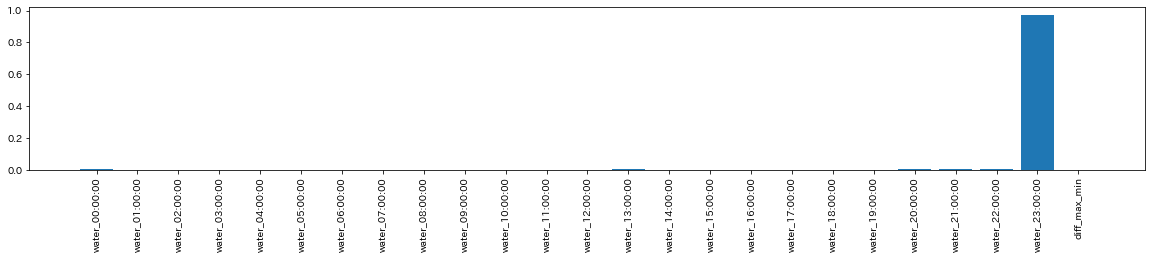

target_01:00:00:finished
rmse: 0.13264067127713716


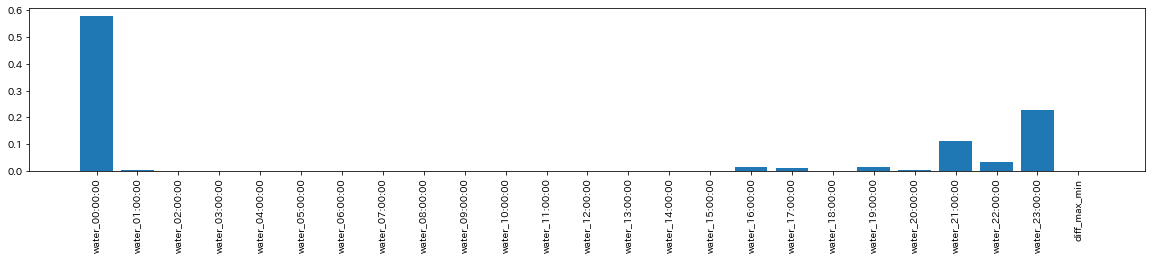

target_02:00:00:finished
rmse: 0.14384569958978663


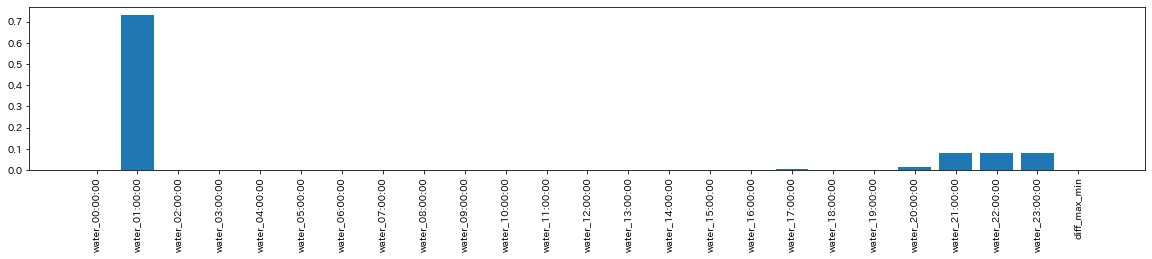

target_03:00:00:finished
rmse: 0.14201916140146315


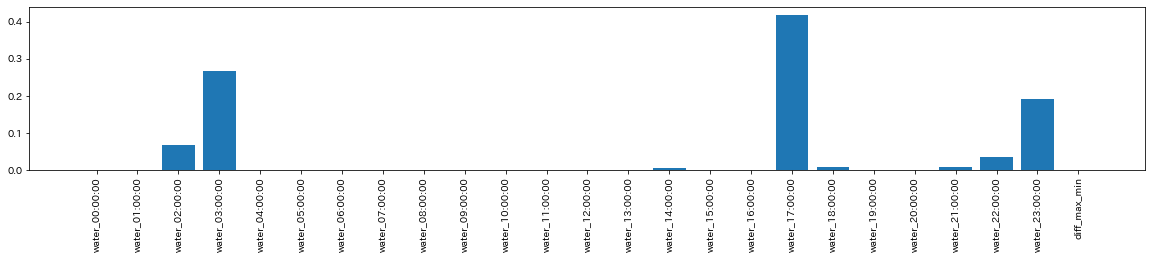

target_04:00:00:finished
rmse: 0.13508305503530993


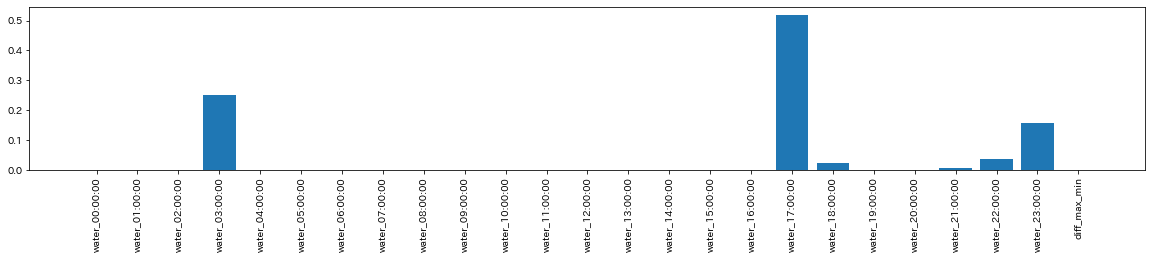

target_05:00:00:finished
rmse: 0.13460140667560277


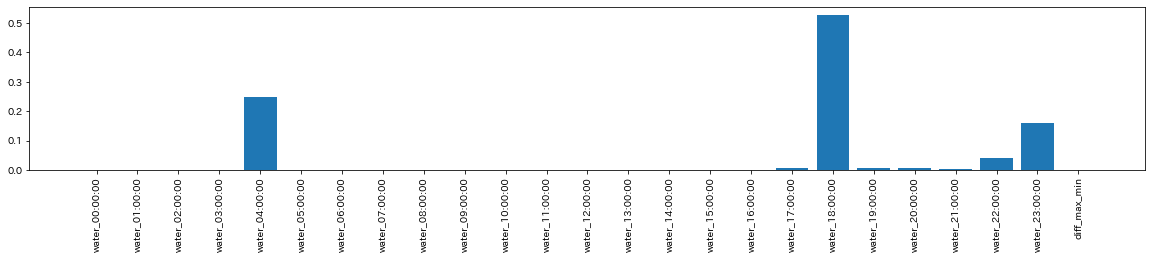

target_06:00:00:finished
rmse: 0.1408188585875499


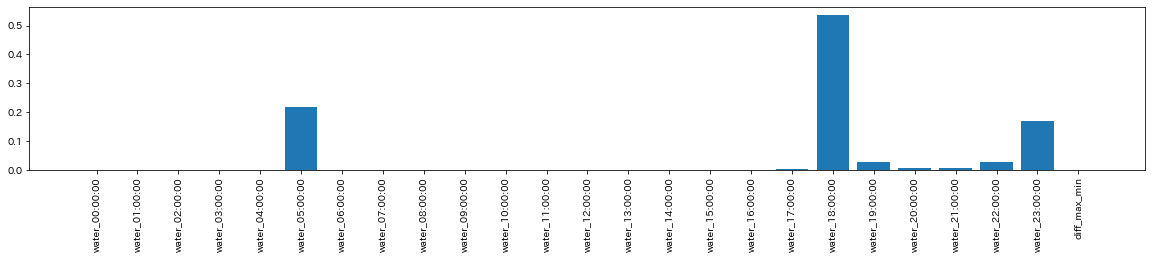

target_07:00:00:finished
rmse: 0.13981242236616848


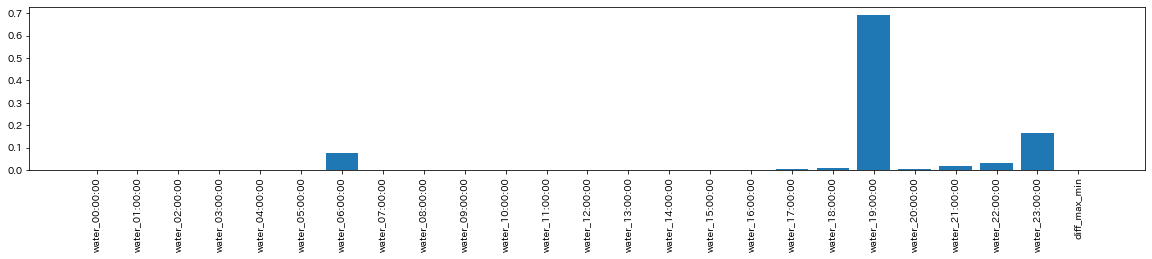

target_08:00:00:finished
rmse: 0.15076263355377842


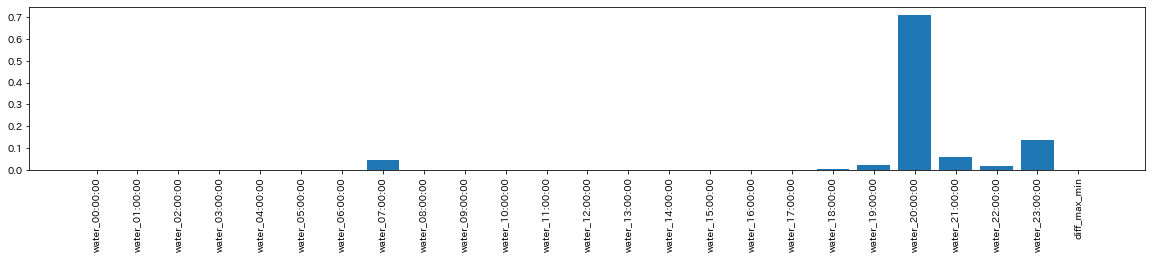

target_09:00:00:finished
rmse: 0.17531441183305127


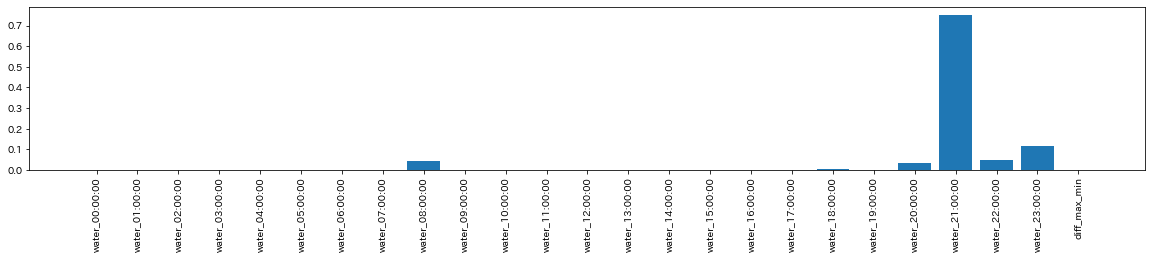

target_10:00:00:finished
rmse: 0.19917648806672192


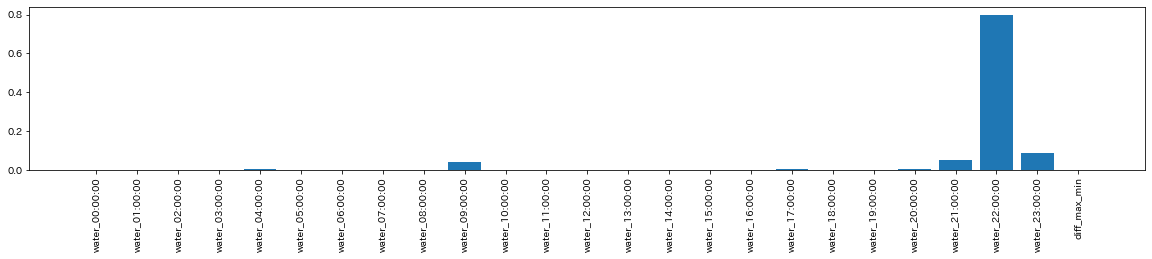

target_11:00:00:finished
rmse: 0.21158294426224114


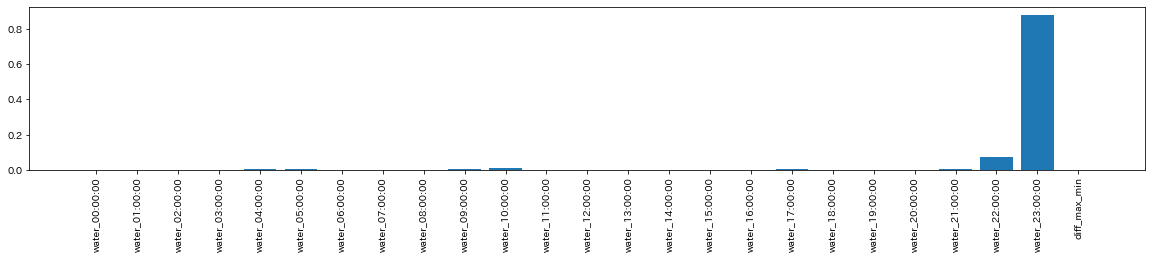

target_12:00:00:finished
rmse: 0.2108350161126243


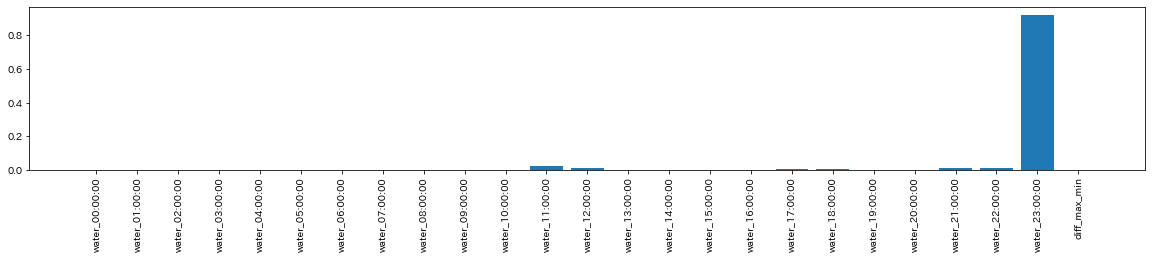

target_13:00:00:finished
rmse: 0.21705035393588923


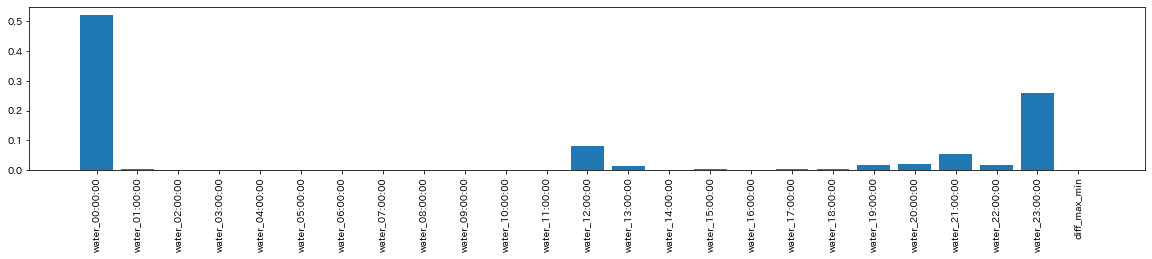

target_14:00:00:finished
rmse: 0.21444502613637784


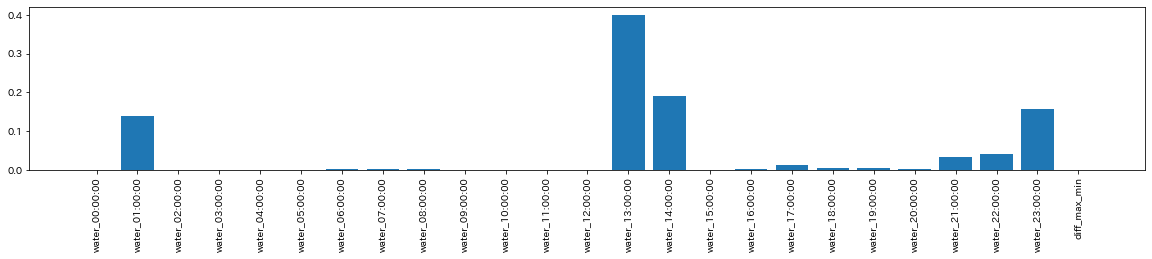

target_15:00:00:finished
rmse: 0.20834283290320885


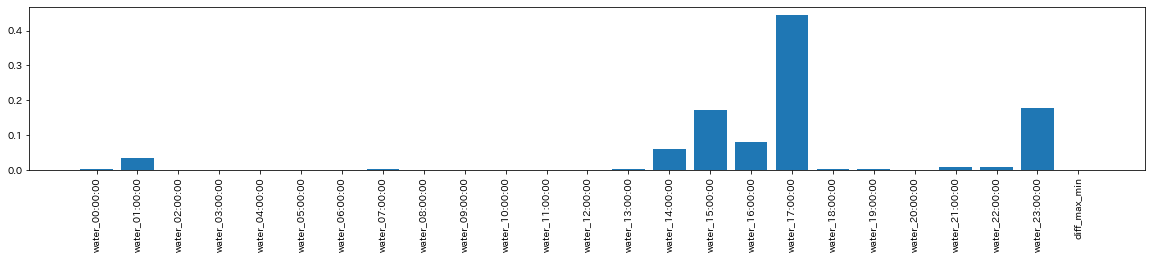

target_16:00:00:finished
rmse: 0.20288078307867527


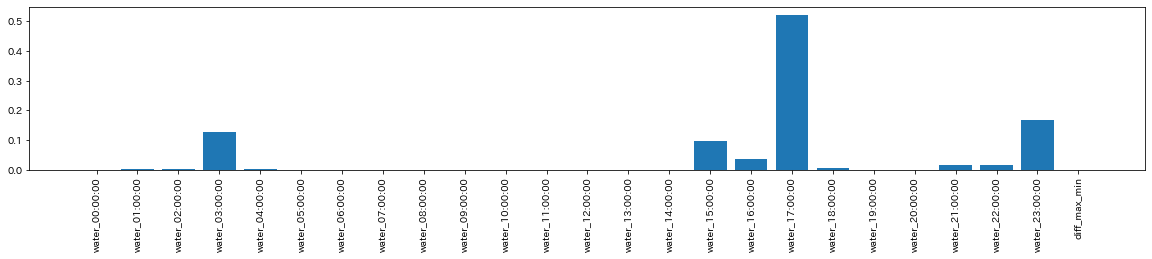

target_17:00:00:finished
rmse: 0.19363881607183062


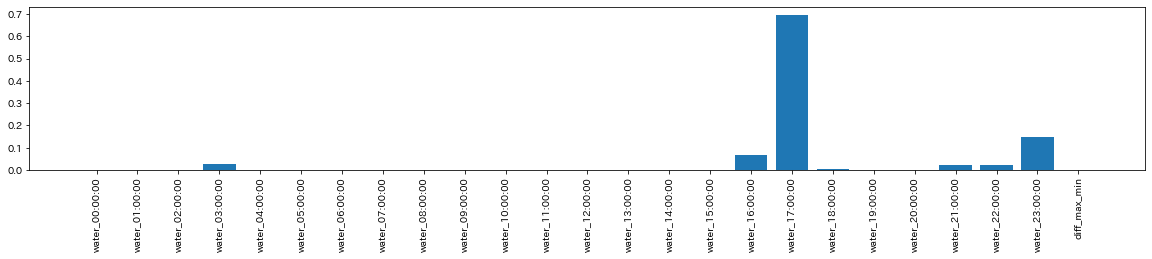

target_18:00:00:finished
rmse: 0.1947730359641586


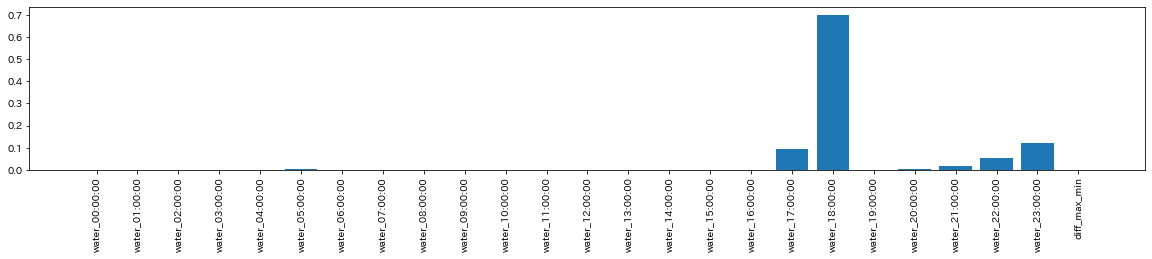

target_19:00:00:finished
rmse: 0.20082550938450924


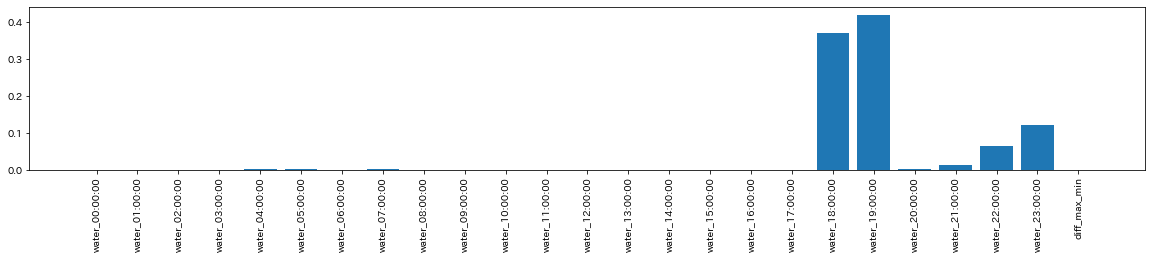

target_20:00:00:finished
rmse: 0.20736243665272525


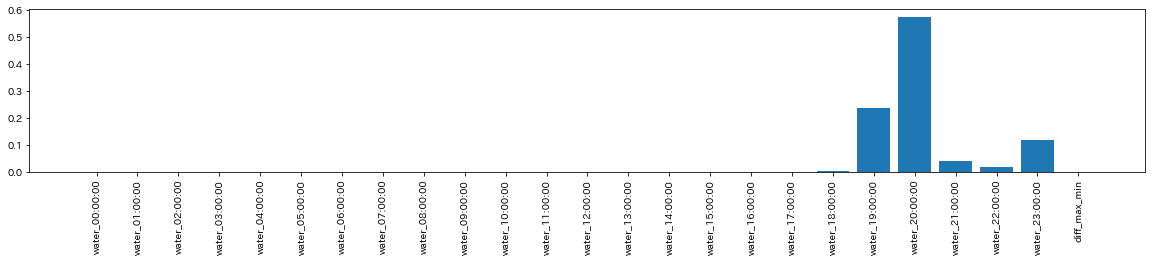

target_21:00:00:finished
rmse: 0.20643694390749176


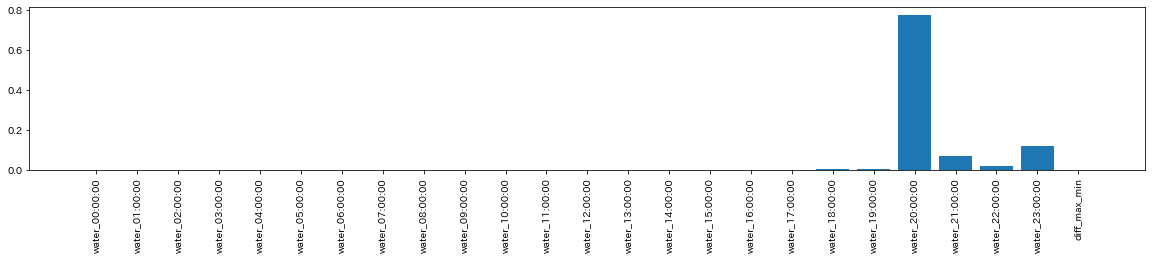

target_22:00:00:finished
rmse: 0.2071293623408975


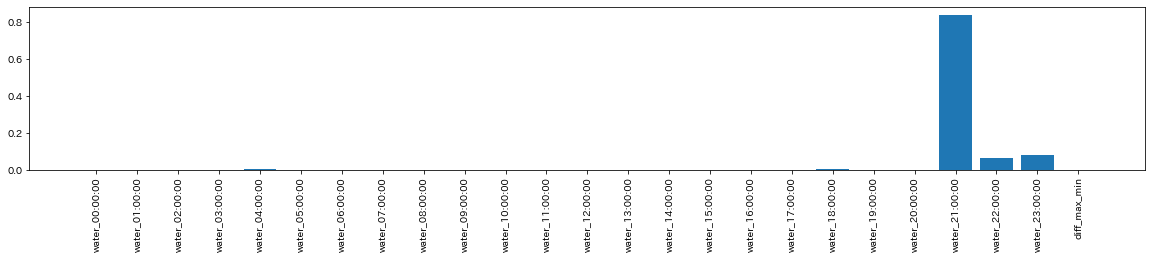

target_23:00:00:finished
rmse: 0.20312748611837925


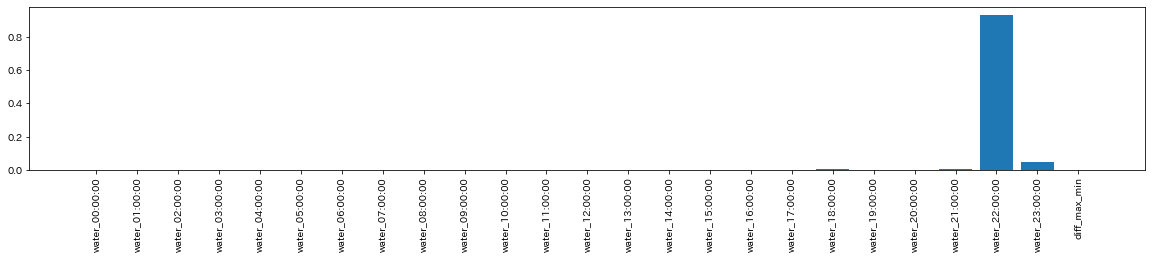

In [48]:
rmse_list = []
for target in y_cols:
    
    model = rfr(n_estimators = 100, max_depth = 5, random_state = 42)
#     model = Ridge()
    model.fit(train_x, train_y[target])
    y_pred = model.predict(test_x)    
    rmse = np.sqrt(mean_squared_error(test_y[target], y_pred))
    
    print(f'{target}:finished')
    print('rmse:', rmse)
    
    plt.figure(figsize = (20, 3))
    plt.bar(x_cols, model.feature_importances_)
    plt.xticks(rotation = 90)
    plt.show()
    
#     filename = f'rfr_model_{target[7:9]}.pkl'
#     pickle.dump(model, open(filename, 'wb'))
    
    rmse_list.append(rmse)

In [49]:
rmse_list

[0.11306016056855253,
 0.13264067127713716,
 0.14384569958978663,
 0.14201916140146315,
 0.13508305503530993,
 0.13460140667560277,
 0.1408188585875499,
 0.13981242236616848,
 0.15076263355377842,
 0.17531441183305127,
 0.19917648806672192,
 0.21158294426224114,
 0.2108350161126243,
 0.21705035393588923,
 0.21444502613637784,
 0.20834283290320885,
 0.20288078307867527,
 0.19363881607183062,
 0.1947730359641586,
 0.20082550938450924,
 0.20736243665272525,
 0.20643694390749176,
 0.2071293623408975,
 0.20312748611837925]

In [51]:
sum(rmse_list)/len(rmse_list)

0.17856522982600545